* * * * *
Метод Штрассена
=================
* * * * *

#### Алгоритм Штрассена предназначен для быстрого умножения матриц. Он был разработан Фолькером Штрассеном в 1969 году и является обобщением метода умножения Карацубы на матрицы, который требует не 8 умножений, а 7.  ####
 
#### Для начала мы разбиваем каждую из исходных матриц на 4 равные части ####



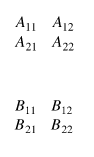

#### Далее мы находим коэфиценты d1, d2, d3, d4, d5, d6, d7 ####

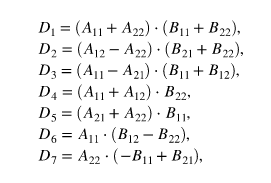

#### И с помощью несложных алгебраических вычислений находим матрицы с11, с12, с21, с22 ####

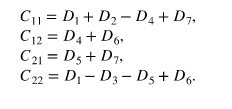

#### Решением является матрица С, которая выглядит следующим образом ####
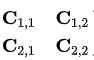

Подробнее с данным алгоритмом вы можете ознакомиться [здесь](https://ru.wikipedia.org/wiki/Алгоритм_Штрассена)
* * * * *

#### Подключим необходимые библиотеки.  

In [1]:
import numpy as np
import random 
import time
import matplotlib.pyplot as plt

* * * * *
#### Ниже представленна функция, реализующая Метод Штрассена
Функция принимает на вход три аргумента: матрицу 1, матрицу 2 
* * * * *

In [2]:
def strassen (mat1,mat2):
    size=len(mat1)
    if (size<=64):
        return (mat1*mat2)
    else:
        
        size_mat=int(size/2)
        
    #Разбиваем матрицу на 4 части
        s1 = np.hsplit(np.vsplit(mat1, 2)[0], 2)
        s2 = np.hsplit(np.vsplit(mat1, 2)[1], 2)
        a11 = s1[0]
        a12 = s1[1]
        a21 = s2[0]
        a22 = s2[1]
    
        s1 = np.hsplit(np.vsplit(mat2, 2)[0], 2)
        s2 = np.hsplit(np.vsplit(mat2, 2)[1], 2)
        b11 = s1[0]
        b12 = s1[1]
        b21 = s2[0]
        b22 = s2[1]
            
    #Находим коэффиценты d
        d1=strassen((a11+a22),(b11+b22))
        d2=strassen((a12-a22),(b21+b22))
        d3=strassen((a11-a21),(b11+b12))
        d4=strassen((a11+a12),(b22))
        d5=strassen((a21+a22),(b11))
        d6=strassen((a11),(b12-b22))
        d7=strassen((a22),(b21-b11))

    #Находим коэффиценты с  
        c11=d1+d2-d4+d7
        c12=d4+d6
        c21=d5+d7
        c22=d1-d3-d5+d6
        
    #Собираем матрицу обратно
        rez=np.vstack([np.hstack([c11, c12]), np.hstack([c21, c22])])
        
        return(rez)

* * * * *
#### Чтобы запустить функцию, нужно ввести число k, которое отвечает за размер матрицы. По условию задачи размер матрицы $2^k$
* * * * *

In [3]:
print('Размер матрицы 2^k.')
print('Введите k')
k=int(input())
size=pow(2,k) #Размер матрицы

mat1=np.random.random((size, size)) #Заполняем рандомными числами матрицы
mat2=np.random.random((size, size))
    
print('mat1')
print(mat1)
print()
print('mat2')
print(mat2)
print()
print('MultyMatrix')
print(strassen(mat1,mat2))

Размер матрицы 2^k.
Введите k
7
mat1
[[0.48170588 0.7020272  0.3338404  ... 0.18645894 0.22496594 0.90938037]
 [0.64869375 0.34891635 0.46359902 ... 0.79843085 0.23259497 0.09283968]
 [0.78949562 0.52407451 0.58388059 ... 0.94193403 0.08856829 0.78661357]
 ...
 [0.31265445 0.93599349 0.58528407 ... 0.44323387 0.22283393 0.98239678]
 [0.17019554 0.72736164 0.92526375 ... 0.61187335 0.62259381 0.78977361]
 [0.86286899 0.08791272 0.07534071 ... 0.50482363 0.07914717 0.1326066 ]]

mat2
[[0.04259304 0.21432133 0.2636211  ... 0.60250509 0.44924325 0.21231508]
 [0.10995089 0.66983211 0.19420095 ... 0.44270214 0.69140771 0.40880421]
 [0.84499415 0.82422164 0.1929252  ... 0.35392938 0.921818   0.18296007]
 ...
 [0.78920153 0.85532332 0.2480566  ... 0.24540316 0.80413362 0.46502427]
 [0.49846142 0.22765654 0.25944184 ... 0.94028617 0.51550358 0.30796068]
 [0.07736333 0.48770402 0.81109679 ... 0.95550131 0.81258008 0.12056607]]

MultyMatrix
[[0.64808273 0.24418453 0.09692285 ... 0.43783966 0.4225

* * * * *
#### На выходе показываются три матрицы.
#### Две изначальные (mat1 и mat2)
#### И матрица результата умножения (Multymatrix)
#### mat1 * mat2 = MultyMatrix.


* * * * *
#### Посчитаем и сравним время выполнения алгоритма двумя разными способами. Обычным умножением и Методом Штрассена, соответсвенно.

In [4]:
mat1=np.random.random((size, size))
mat2=np.random.random((size, size))

x=[0,0,0,0]                #время выполнения обычного умножения
t=[0,0,0,0]                #время выполнения умножения методом штрассена
n=[16,32,64,128]           #соответствующие размеры матриц

size = n[0]       
i=0

#считаем время для каждого нового размера 
while size < n[3]+1:
    mat1=np.random.random((size, size))
    mat2=np.random.random((size, size))
    
    startTime = time.time()
    strassen(mat1,mat2)
    endTime = time.time()
    t[i]=endTime - startTime 
    
    startTime = time.time() 
    np.matmul(mat1,mat2)
    endTime = time.time()
    x[i]=endTime - startTime 
    
    size = size*2
    i=i+1
 

print(x)
print(t)

[9.655952453613281e-05, 3.147125244140625e-05, 5.435943603515625e-05, 0.008997917175292969]
[1.811981201171875e-05, 6.4373016357421875e-06, 5.7220458984375e-06, 0.0005228519439697266]


* * * * *
#### Посмотрим на зависимость времени от порядка матриц на графике.
#### Красный график метод обычного умножения, зеленый - метод умножения Штрассена.
* * * * *

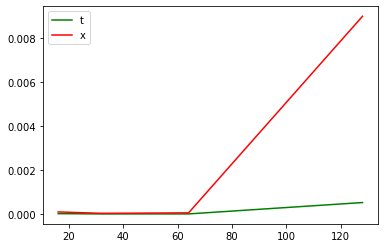

In [5]:
plt.plot(n, t, 'g', label = 't')
plt.plot(n, x, 'r' ,label='x')
plt.legend()
plt.show()

#### Мы видим, что алгоритм Штрассена работает в разы быстрее, по сравнению с обычным умножением матриц. Скорость такого метода равна $O(n^{log_2 7})$, что примерно равно  $O(n^{2.81})$.  Обычный алгоритм умножения матриц тратит  $O(n^{log_2 8})$ , что равно соотвественно   $O(n^{3})$
